In [1]:
#Importing libraries}
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets.samples_generator import make_blobs

In [2]:
#We create 40 seperable points
X, y = make_blobs(n_samples=40, centers=2, random_state=20)
#Fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X,y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

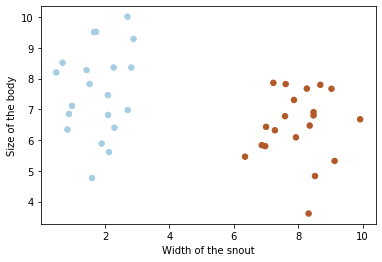

In [3]:
#Display the data in graph form
plt.scatter(X[:,0], X[:,1], c=y, s=30, cmap=plt.cm.Paired)
plt.xlabel('Width of the snout')
plt.ylabel('Size of the body')
plt.show()

In [4]:
#Predict unknown data
newData = [[3,4],[5,6]]
print(clf.predict(newData))

[0 1]


In [5]:
print(clf.predict([[8,10]]))

[1]


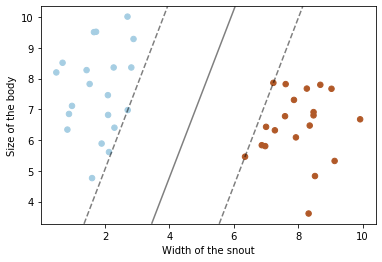

In [6]:
#Fit the model, don't regularize for illustration
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X,y)
plt.scatter(X[:,0], X[:,1], c=y, s=30, cmap=plt.cm.Paired)
plt.xlabel('Width of the snout')
plt.ylabel('Size of the body')

#Plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

#Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

#Plot decision boundary and margin
ax.contour(XX, YY, Z, colors='k', levels=[-1,0,1], alpha=0.5, linestyles=['--','-','--'])
#Plot support vectors
ax.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=100, linewidth=1, facecolors='None')
plt.show()